<a href="https://colab.research.google.com/github/AlvaroBecker/predicciones-de-ventas/blob/parte3/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
filename='https://drive.google.com/uc?id=1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw&export=download'
df = pd.read_csv(filename)

1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

 

Aquí encontrarán algunos recursos para ayudarlos a considerar más maneras avanzadas de lidiar con valores faltantes en el conjunto de datos (consulten los recursos adicionales opcionales de Pandas al final de este capítulo para obtener más recursos al respecto):
Datos faltantes, sus tipos y métodos estadísticos para lidiar con ellos
6 diferentes maneras de compensar los valores faltantes en un conjunto de datos
Lidiando con datos faltantes: Supuestos y métodos clave para el análisis aplicado
No duden en usar otros recursos o técnicas que encuentren en línea que crean que pueden ser adecuados/útiles.
Diccionario de datos para este conjunto de datos:



| Variable | Descripción |
|----------|-------------|
| Item_Identifier | Identificación única del producto |
| Item_Weight | Peso del producto |
| Item_Fat_Content | Si el producto es bajo en grasa o regular |
| Item_Visibility | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type | Categoría a la que el producto pertenece |
| Item_MRP | Precio máximo de venta al público (precio de catálogo) del producto |
| Outlet_Identifier | Identificación única de la tienda |
| Outlet_Establishment_Year | El año en que se estableció la tienda |
| Outlet_Size | El tamaño de la tienda en cuanto al área total |
| Outlet_Location_Type | El tipo de área donde se encuentra la tienda |
| Outlet_Type | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado |
| Item_Outlet_Sales | Ventas del producto en una tienda particular. Es la variable objetivo a predecir. |

In [4]:
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [5]:
#1) ¿Cuántas filas y columnas?
print(df.shape)

(8523, 12)


In [6]:
df['Item_Identifier'].nunique()

1559

In [7]:
#2) ¿Cuáles son los tipos de datos en cada variable?
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [8]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
#print(df.duplicated().sum())

0


In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

    No se pueden eliminar filas donde Item_Weight o Outlet_Size sea nulo e Item_Outlet_Sale sea mayor a 0 porque se perderían ventas.

    Por lo que se optara por evaluar las relaciones entre columnas e identificar la estrategia de rellenado

Identificadas las columnas que contienen datos nulos, procedemos a estudiar los casos

In [10]:
rows_na=df[df.isnull().any(True)]

In [11]:
rows_na

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Elegimos una fila de ejemplo y revisamos el identificador del item 'Item_Identifier' y nos aseguramos que todos los datos que pertenecen a ese ejemplo sean nulos , en caso contrario es un buen identificador para rellenar 'Item_Weight'

In [12]:
df.loc[df['Item_Identifier']==rows_na['Item_Identifier'].iloc[0]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
1491,FDX07,19.2,Regular,0.022914,Fruits and Vegetables,181.195,OUT035,2004,Small,Tier 2,Supermarket Type1,2380.235
2459,FDX07,19.2,Regular,0.022965,Fruits and Vegetables,181.695,OUT045,2002,NaN,Tier 2,Supermarket Type1,2563.330
3089,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,184.595,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.995
5906,FDX07,19.2,Regular,0.022954,Fruits and Vegetables,184.495,OUT049,1999,Medium,Tier 1,Supermarket Type1,4028.090
7735,FDX07,NaN,Regular,0.022808,Fruits and Vegetables,183.495,OUT027,1985,Medium,Tier 3,Supermarket Type3,4577.375


Podemos Observar que el 'Item_Identifier' de ejemplo posee solo un valor para 'Item_Weight' y contiene solo un valor nulo, por lo que se utilizara esta columna para agrupar y rellenar los nulos con su valor, para asegurarnos de que siempre se cumpla la regla utilizaremos el promedio de ellos para el procedimiento


In [13]:
df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'), inplace=True)

Ahora procederemos a revisar los casos de la columna 'Outlet_Size' 

In [14]:
df.loc[df['Outlet_Identifier']==rows_na['Outlet_Identifier'].iloc[0]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [15]:
df.loc[df['Outlet_Identifier']==rows_na['Outlet_Identifier'].iloc[0]].shape

(555, 12)

Este pequeno codigo nos indica que los Outlet con nulos poseen el mismo 'Outlet_Identifier', por lo que procederemos a buscar otro punto de relacion

In [16]:
df.loc[df['Outlet_Type']==rows_na['Outlet_Type'].iloc[0]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Al realizar esta busqueda encontramos que 'Outlet_Type' posee distintos 'Outlet_Identifier' y no todos los valores son nulos, sin embargo todos tienen el mismo valor, por lo que se utilizara esta columna para rellenar los nulos

In [17]:
df['Outlet_Size'].fillna(df.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

In [18]:
df.isna().sum()


Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

al terminar el procedimiento podemos ver que aun quedan 4 datos nulos en la columna Item_Weight, revisaremos si es posible rellenarlos con otro metodo u optaremos por eliminarlos

In [19]:
rows_na=df[df.isnull().any(True)]
rows_na

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [20]:
identificadores_nulos = rows_na['Item_Identifier'].tolist()
df_filtrado = df[df['Item_Identifier'].isin(identificadores_nulos)]


In [21]:
df_filtrado

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [22]:
df.loc[df['Item_Fat_Content']==rows_na['Item_Fat_Content'].iloc[0]]['Item_Weight'].mean()

12.694632709632707

In [23]:
df['Item_Weight'].fillna(df.groupby(['Item_Fat_Content'])['Item_Weight'].transform('mean'), inplace=True)

Para evitar eliminar filas, se opto por rellenar los datos faltantes con el promedio de su 'Item_Weight' agrupados por 'Item_Fat_Content'

In [24]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
#7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 
categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [26]:
filtrar_categoricas=df[categoricas]
valores_unicos_por_columna = df[categoricas].apply(lambda x: x.unique())

In [27]:
valores_unicos_por_columna

Item_Identifier         [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Fat_Content                     [Low Fat, Regular, low fat, LF, reg]
Item_Type               [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Outlet_Identifier       [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Size                                         [Medium, Small, High]
Outlet_Location_Type                             [Tier 1, Tier 3, Tier 2]
Outlet_Type             [Supermarket Type1, Supermarket Type2, Grocery...
dtype: object

Se puede observar que Item_Fat_Content tiene distintos valores para referirse a un solo tipo de dato, procederemos a reemplazar los valores repetidos por un unico representante

In [28]:
mapeo = {
    "LF":"Low Fat", 
    "low fat": "Low Fat" ,
    "reg": "Regular"
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(mapeo)

In [29]:
filtrar_categoricas=df[categoricas]
valores_unicos_por_columna = df[categoricas].apply(lambda x: x.unique())
valores_unicos_por_columna

Item_Identifier         [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Fat_Content                                       [Low Fat, Regular]
Item_Type               [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
Outlet_Identifier       [OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...
Outlet_Size                                         [Medium, Small, High]
Outlet_Location_Type                             [Tier 1, Tier 3, Tier 2]
Outlet_Type             [Supermarket Type1, Supermarket Type2, Grocery...
dtype: object

In [30]:
#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
estadisticas=df.describe()
estadisticas.loc[['mean', 'min', 'max']]


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.875368,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<function matplotlib.pyplot.show(close=None, block=None)>

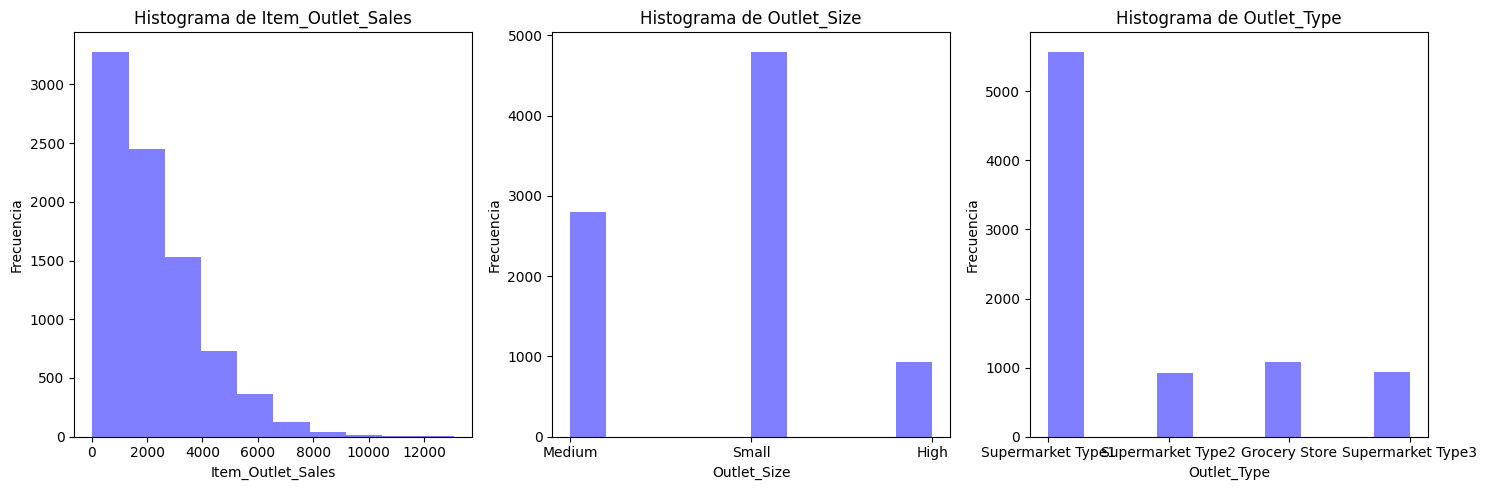

In [42]:
import matplotlib.pyplot as plt

# Seleccionar características de interés

features = ['Item_Outlet_Sales', 'Outlet_Size', 'Outlet_Type']

# Crear un subplot para cada característica
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Iterar a través de las características y trazar histogramas
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=10, alpha=0.5, color='blue')
    axes[i].set_title(f'Histograma de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')

# Mostrar gráficos
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

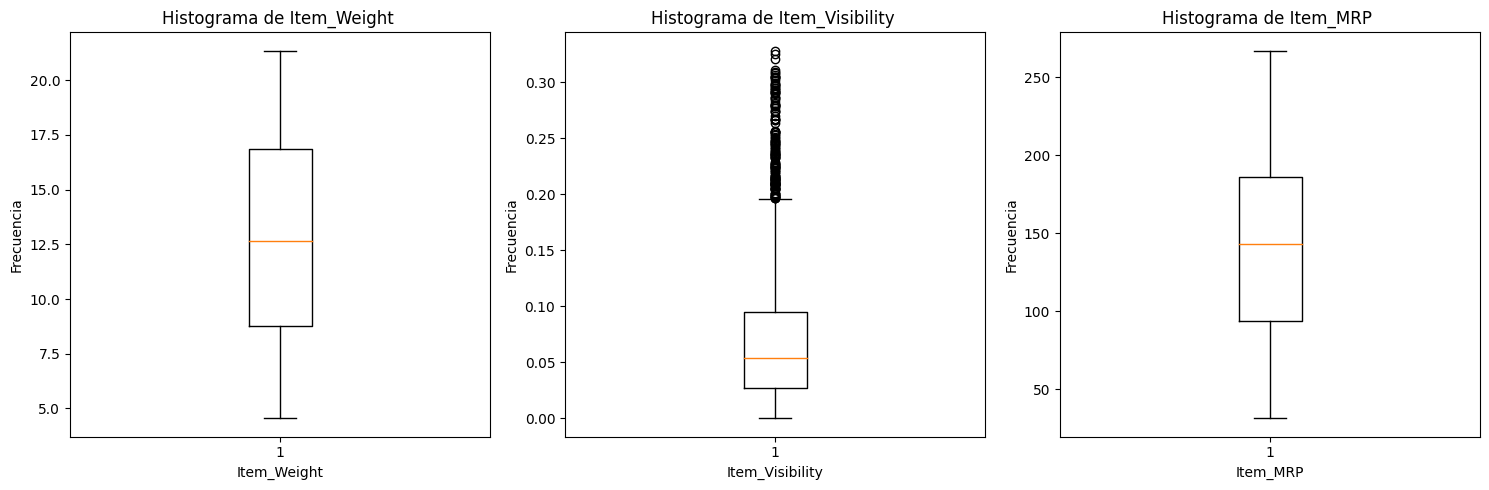

In [43]:
import matplotlib.pyplot as plt

# Seleccionar características de interés
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
# Agrupar por 'Item_Identifier' y calcular la media de cada grupo
grouped_df = df.groupby('Item_Identifier')[features].mean()

# Crear un subplot para cada característica
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Iterar a través de las características y trazar histogramas
for i, feature in enumerate(features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Histograma de {feature} ')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')

# Mostrar gráficos
plt.tight_layout()
plt.show

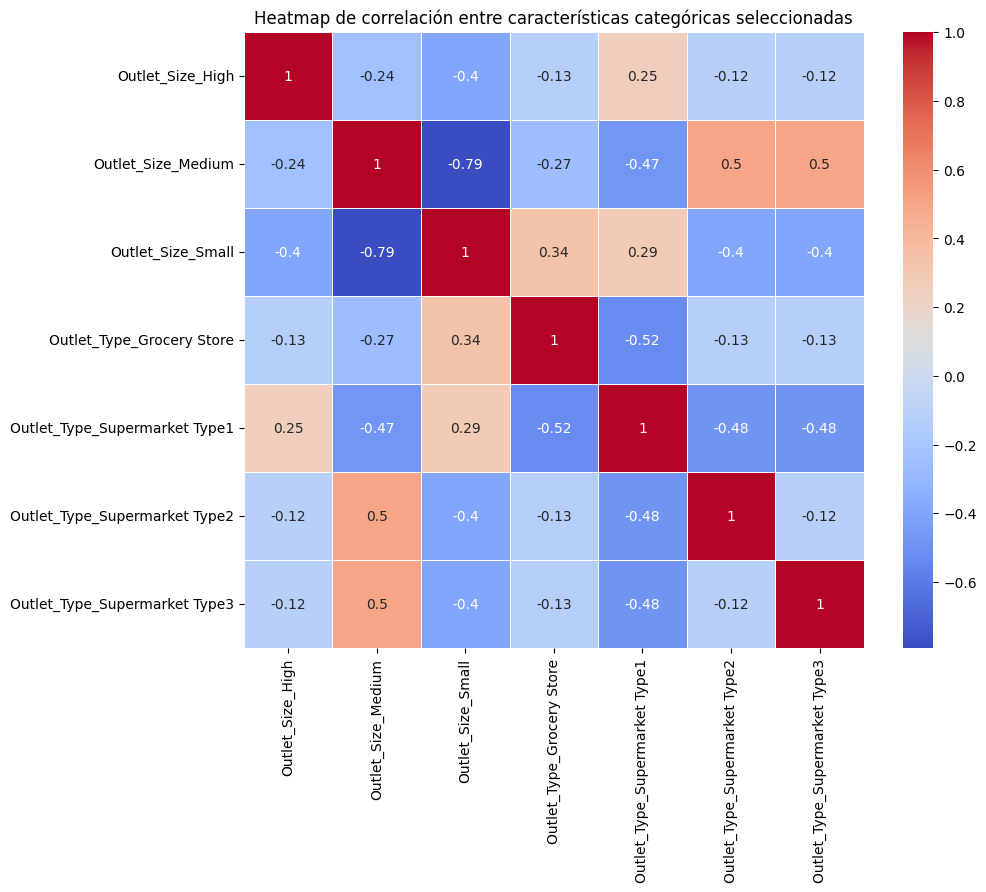

In [44]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

enc = OneHotEncoder()

# Especifica las columnas de interés
columnas_de_interes = ['Outlet_Size', 'Outlet_Type']

# Filtrar las columnas categóricas de interés
df_categorical_columns = df[columnas_de_interes]

# Ajustar y transformar las columnas categóricas seleccionadas
enc.fit(df_categorical_columns)
encoded_array = enc.transform(df_categorical_columns).toarray()

# Convertir la matriz codificada one-hot en un DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=enc.get_feature_names_out(columnas_de_interes))

# Calcular la correlación entre las columnas codificadas
correlation_matrix = encoded_df.corr()

# Crear un heatmap usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Establecer el título y mostrar el gráfico
plt.title("Heatmap de correlación entre características categóricas seleccionadas")
plt.show()


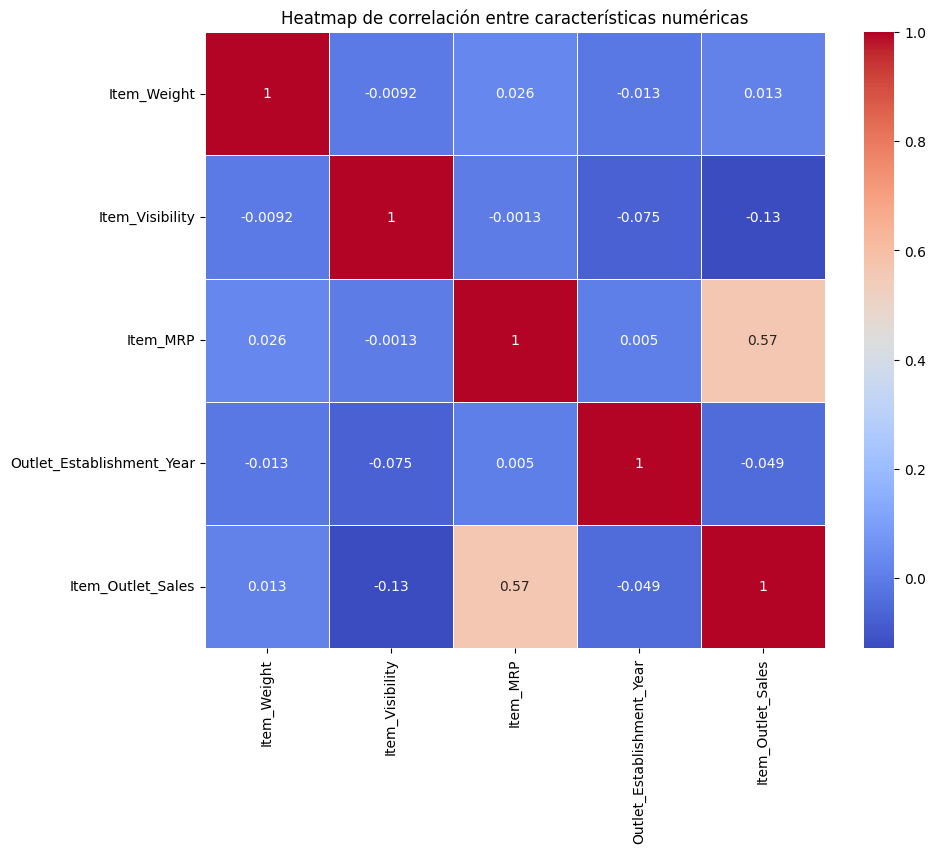

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación entre las columnas numéricas
correlation_matrix = df.corr()

# Crear un heatmap usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Establecer el título y mostrar el gráfico
plt.title("Heatmap de correlación entre características numéricas")
plt.show()
